In [1]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt
import pickle

#.py
from core import prices as pr 


### Import the data calculate on cluster thanks to the file res_multiplayers.py

In [2]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_multiplayers.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[[0.35383573, 0.31656352],
        [0.30044391, 0.21095841],
        [0.24935065, 0.38030686],
        ...,
        [0.35000005, 0.25814065],
        [0.18066549, 0.42697339],
        [0.33699279, 0.22909022]],

       [[0.1693556 , 0.37425086],
        [0.1127603 , 0.36473437],
        [0.37294167, 0.29794032],
        ...,
        [0.25951759, 0.28423276],
        [0.3313785 , 0.27129972],
        [0.23970425, 0.28623713]],

       [[0.29421414, 0.19161785],
        [0.30712217, 0.18127001],
        [0.21612698, 0.4126143 ],
        ...,
        [0.2368855 , 0.35316849],
        [0.348903  , 0.19597966],
        [0.23089762, 0.30318062]],

       ...,

       [[0.39972835, 0.21249213],
        [0.31359405, 0.31359405],
        [0.37425086, 0.1693556 ],
        ...,
        [0.35316849, 0.2368855 ],
        [0.32893264, 0.32893264],
        [0.35316849, 0.2368855 ]],

       [[0.21894718, 0.21894718],
        [0.24093356, 0.32017985],
        [0.17385306, 0.39386148],
        

[[0.29058118 0.27020315]
 [0.24683626 0.31950933]
 [0.30872146 0.27455911]
 ...
 [0.29115188 0.3043734 ]
 [0.29364899 0.30174223]
 [0.2933676  0.2823172 ]]
[[0.14647995 0.21508207 0.16778059]
 [0.1604918  0.17699935 0.2098614 ]
 [0.18983092 0.18787682 0.13596006]
 ...
 [0.16260121 0.18565399 0.17664317]
 [0.18820245 0.15544563 0.17566954]
 [0.2018497  0.18655247 0.19054336]]
[[0.09470807 0.12433085 0.11730993 0.11998389]
 [0.14098905 0.12099688 0.09555614 0.13537107]
 [0.1316329  0.11236469 0.1344447  0.13492205]
 ...
 [0.10086526 0.11825565 0.1356496  0.1146581 ]
 [0.10104667 0.12436544 0.13700168 0.12981376]
 [0.10918611 0.10963089 0.13095341 0.12228348]]
[[0.0892089  0.11081652 0.1037949  0.08789637 0.07257468]
 [0.09520575 0.09139244 0.09367871 0.11456984 0.08863833]
 [0.09554896 0.09447678 0.07806443 0.08982721 0.10218949]
 ...
 [0.08416459 0.09423034 0.09290405 0.07770411 0.07399854]
 [0.07398098 0.09131598 0.09460407 0.09139535 0.06938829]
 [0.07448438 0.09189358 0.09428047 0.13

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_2961/1017582646.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Volumes/OS-Data/Suzie_data/RLandPricing/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


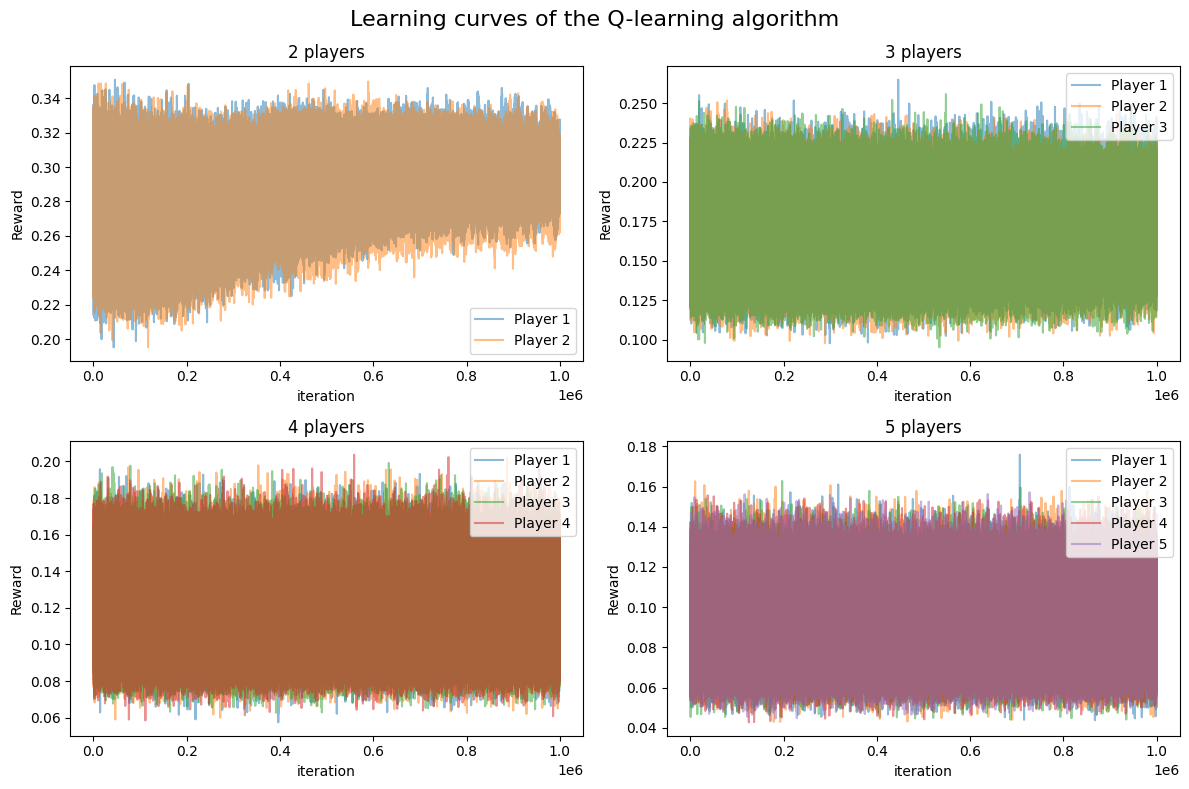

In [7]:
agg = []
for param_ind in range(len(aggregated_agents)):
    obj = np.array(aggregated_agents[param_ind]).mean(axis=0)
    print(obj)
    agg.append(obj)
num_graphs = len(agg)


# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(agg[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(agg[graph_num][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'{graph_num+2} players')
    
    # Add a legend to the subplot
    ax.legend()
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

# Remove any unused subplots
if num_graphs < 4:
    for i in range(num_graphs, 4):
        fig.delaxes(axes[i])
        
fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

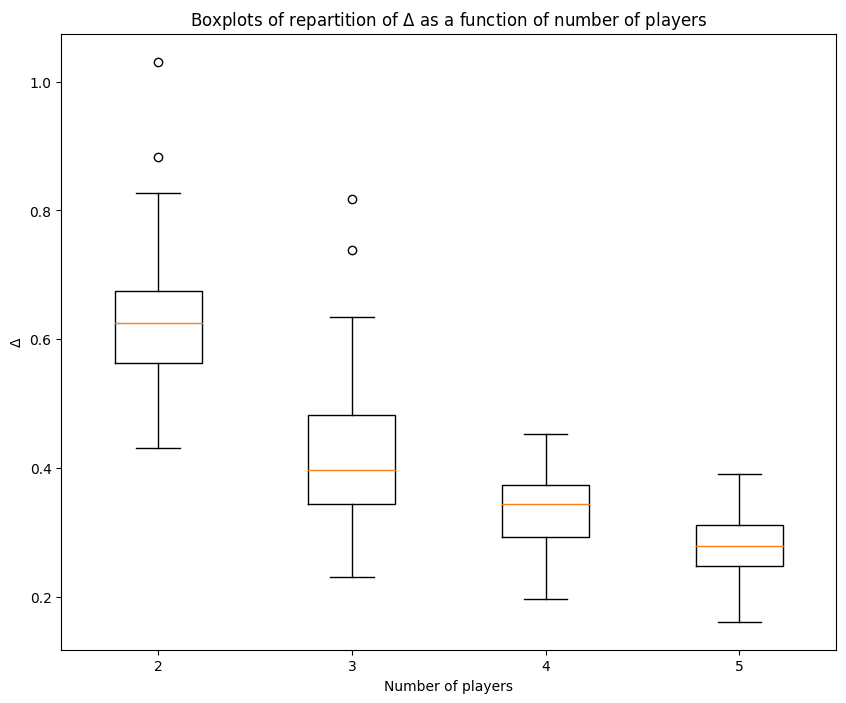

In [12]:
nb_players = 5
RN = []
RC = []
for i in range (2,nb_players+1):
    prices = pr.PriceOptimizer(nb_players=i)
    collusion_profit, collusion_prices = prices.CollusionPrice()
    nash_profit, nash_prices = prices.NashPrice()
    RN.append(nash_profit)
    RC.append(collusion_profit)
    
Rmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0])))
DRmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0]))) 
box = np.zeros((len(aggregated_agents), 2*len(aggregated_agents[0])))

# Parameters
n_params = len(aggregated_agents)

# Loop through each parameter  
for param_ind in range(n_params):

  # Loop through each sample
  for sample_ind in range(len(aggregated_agents[0])):
    for j in range (2):
      Rmean[param_ind][sample_ind][j] = aggregated_agents[param_ind][sample_ind][-100:,j].mean()
      DRmean[param_ind][sample_ind][j] = (Rmean[param_ind][sample_ind][j] - RN[param_ind])/(RC[param_ind] - RN[param_ind]) 
  box[param_ind] = DRmean[param_ind].reshape(2*len(aggregated_agents[0]))
      

# Mettre les données dans une liste
data = [box[param_ind] for param_ind in range(len(aggregated_agents))]

fig, ax = plt.subplots(figsize=(10, 8))

# Tracer les boxplots
ax.boxplot(data, 
           notch=False, 
           positions=[1,2,3,4]) 

# Personnaliser les axes
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['2', '3', '4', '5'])

ax.set_xlabel('Number of players')
ax.set_ylabel('$\\Delta$')

# Ajouter un titre
plt.title('Boxplots of repartition of $\\Delta$ as a function of number of players')

plt.show()